### **Typical Curve $T(^\circ C) \times R(\Omega)$ for an NTC Thermistor**

The characteristic resistence curve for an NTC thermistor is given by

$$R(T) = R(T_0)e^{\beta(\frac{1}{T} - \frac{1}{T_0})}$$ 

Where $\beta$ and $R(T_0)$ are parameters for the specific NTC used. \
We can measure $\beta$ using two measurements of temperature / resistance:  
$$\beta = \frac{ln|\frac{R(T_1)}{R(T_0)}|}{\frac{1}{T_1} - \frac{1}{T_0}}$$ 

Then for every new temperature we want to specify based on the resistance \
found in the NTC, we can use the rearranged first equation:  
$$T(R) = \frac{\beta T_0}{ln|\frac{R}{R(T_0)}|T_0 + \beta}$$ 

For our use case, we have $\beta$ = 3935 for a NTC $10k\Omega$. \
This way we can plot the typical characteristic curve:

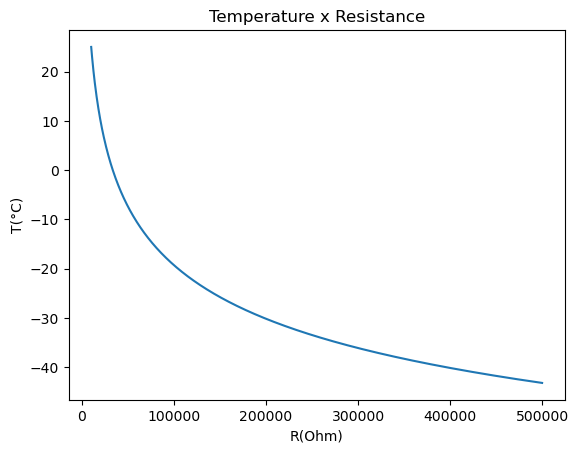

In [3]:
import matplotlib.pyplot as plt
import numpy as np

BETA_COEFF = 3935
T_0 = 298.15
R_0 = 10000

def T(x):
    return (BETA_COEFF*T_0)/(np.log(x/R_0)*T_0 + BETA_COEFF)

R = np.linspace(500000, 10000, 1000)

temp = []

for value in R:
    temp.append(T(value) - 273.15)

plt.title("Temperature x Resistance")
plt.xlabel("R(Ohm)")
plt.ylabel("T(°C)")
plt.plot(R, temp)
plt.show()


### Medidas do ADC (ESP32 - DevKit)

**The ESP32 ADC limitations:** 

Analyzing the **ESP32 - DevKit** documentation we found that the board's **ADC2** is not suitable for our current application, as the **ADC2** raises restritions when used 
in conjunction with the WiFi module, which will be necessary for the Biotemp application.


#### Temperature Calculation 

As explained previously, the temperature is calculated based on the 
resistance measured in the NTC sensor, this resistance is obtained using the 
voltage across the voltage divider at the ESP 32's ADC pin.

More explicitly, we manipulate the voltage divider formula and get

$$R_{NTC} = \frac{10000}{(\frac{3,3}{V_{ADC}} - 1)}$$

The sequence of this process is then defined as:
Read the ADC -> Calculate the Resistance -> Calculate the Temperature

Next we have some empirical data for this process: 

In [4]:
import pandas as pd

data = pd.read_csv('ADCread.csv', usecols=['R', 'Expected', 'GPIO 2', 'GPIO 35'])
df = pd.DataFrame(data=data)

df.head(n=10)

,R,Expected,GPIO 2,GPIO 35
0,0,0.0,0.128,0.142
1,340,0.1,0.145,0.162
2,640,0.2,0.225,0.220
3,1000,0.3,0.315,0.317
4,1400,0.4,0.400,0.424
5,1800,0.5,0.480,0.521
6,2240,0.6,0.560,0.623
7,2720,0.7,0.630,0.730
8,3240,0.8,0.700,0.822
9,3750,0.9,0.760,0.915


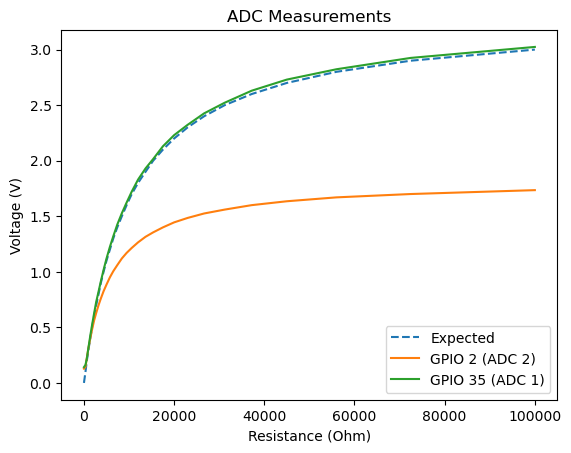

In [5]:
subtitles = ["Expected", "GPIO 2 (ADC 2)", "GPIO 35 (ADC 1)"]

plt.title("ADC Measurements")
plt.ylabel("Voltage (V)")
plt.xlabel("Resistance (Ohm)")
plt.plot(df['R'], df['Expected'], "--")
plt.plot(df['R'], df['GPIO 2'])
plt.plot(df['R'], df['GPIO 35'])
plt.legend(subtitles, loc = "lower right")
plt.show()